# Advanced Life Support Exploratory Data Analysis

The objective of this project is to analyze and visualize the data provided by the Tempe Fire Medical Rescue Department (TFMR) for the year 2015 and to measure the total response times. The goal set by the TFMR is to achieve a maximum of 6 minutes for 90% of the incidents responded to. 

The chance for full recovery for each patient is significantly improved by faster response times thus making this analysis of great importance with the opportunity to identify areas of improvement and potentially save lives in the Tempe area.

We will be fullfilling our objective by answering the following key questions:

        - Q1: Are at least 90% of the response times under 6 minutes?
        - Q2: Are there any units that are underperforming in regards to response times?
          
I will be using the data provided by the city of Temp, Arizona's website (data.temp.gov) to conduct the analyzation of the datasets.

# Collect and Prepare Data

### Import Libraries

In [1]:
import pandas as pd
import os
from datetime import datetime, timedelta
import numpy as np
from matplotlib import pyplot as plt

### Download Data

In [2]:
df = pd.read_csv(r"C:\Users\josep\OneDrive\Documents\GitHub\tmfr-als-data-cleaning\als_data_2015\1.01_ALS_Response_Time__2015_.csv")
df

,Unit,Inci_no,Disp_date,Disp_time,Notif_date,Notif_time,Roll_date,Roll_time,Arv_date,Arv_time,City,Fdid,Final_nature,Dispatch_Datetime,Notification_Datetime,Roll_Datetime,Arrival_Datetime,ObjectId
0,E274,15-0019651,2015/01/17 07:00:00+00,2020/01/02 18:08:24+00,2015/01/17 07:00:00+00,2020/01/02 18:08:47+00,2015/01/17 07:00:00+00,2020/01/02 18:08:51+00,2015/01/17 07:00:00+00,2020/01/02 18:11:06+00,TEMPE,8293,CVA,2015/01/17 18:08:24+00,2015/01/17 18:08:47+00,2015/01/17 18:08:51+00,2015/01/17 18:11:06+00,1
1,E276,15-0051388,2015/02/12 07:00:00+00,2020/01/02 17:33:06+00,2015/02/12 07:00:00+00,2020/01/02 17:33:57+00,2015/02/12 07:00:00+00,2020/01/02 17:34:04+00,2015/02/12 07:00:00+00,2020/01/02 17:34:41+00,TEMPE,8293,DIAB,2015/02/12 17:33:06+00,2015/02/12 17:33:57+00,2015/02/12 17:34:04+00,2015/02/12 17:34:41+00,2
2,E278,15-0237569,2015/07/13 07:00:00+00,2020/01/03 02:47:09+00,2015/07/13 07:00:00+00,2020/01/03 02:47:46+00,2015/07/13 07:00:00+00,2020/01/03 02:48:49+00,2015/07/13 07:00:00+00,2020/01/03 02:49:51+00,TEMPE,8293,CP,2015/07/14 02:47:09+00,2015/07/14 02:47:46+00,2015/07/14 02:48:49+00,2015/07/14 02:49:51+00,3
3,E273,15-0250135,2015/07/24 07:00:00+00,2020/01/02 22:35:39+00,2015/07/24 07:00:00+00,2020/01/02 22:36:53+00,2015/07/24 07:00:00+00,2020/01/02 22:37:00+00,2015/07/24 07:00:00+00,2020/01/02 22:38:21+00,TEMPE,8293,UNC,2015/07/24 22:35:39+00,2015/07/24 22:36:53+00,2015/07/24 22:37:00+00,2015/07/24 22:38:21+00,4
4,E278,15-0186286,2015/06/01 07:00:00+00,2020/01/03 05:01:18+00,2015/06/01 07:00:00+00,2020/01/03 05:02:04+00,2015/06/01 07:00:00+00,2020/01/03 05:02:27+00,2015/06/01 07:00:00+00,2020/01/03 05:04:00+00,TEMPE,8293,ALOC,2015/06/02 05:01:18+00,2015/06/02 05:02:04+00,2015/06/02 05:02:27+00,2015/06/02 05:04:00+00,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9200,E271,15-0001669,2015/01/02 07:00:00+00,2020/01/02 17:27:36+00,2015/01/02 07:00:00+00,2020/01/02 17:29:08+00,2015/01/02 07:00:00+00,2020/01/02 17:29:26+00,2015/01/02 07:00:00+00,2020/01/02 17:50:30+00,TEMPE,8293,CB,2015/01/02 17:27:36+00,2015/01/02 17:29:08+00,2015/01/02 17:29:26+00,2015/01/02 17:50:30+00,9201
9201,M276,15-0001669,2015/01/02 07:00:00+00,2020/01/02 17:27:36+00,2015/01/02 07:00:00+00,2020/01/02 17:29:08+00,2015/01/02 07:00:00+00,2020/01/02 17:29:54+00,2015/01/02 07:00:00+00,2020/01/02 17:50:30+00,TEMPE,8293,CB,2015/01/02 17:27:36+00,2015/01/02 17:29:08+00,2015/01/02 17:29:54+00,2015/01/02 17:50:30+00,9202
9202,E276,15-0162105,2015/05/12 07:00:00+00,2020/01/03 02:04:40+00,2015/05/12 07:00:00+00,2020/01/03 02:42:05+00,2015/05/12 07:00:00+00,2020/01/03 02:42:15+00,2015/05/12 07:00:00+00,2020/01/03 02:44:27+00,TEMPE,8293,ALOC,2015/05/13 02:04:40+00,2015/05/13 02:42:05+00,2015/05/13 02:42:15+00,2015/05/13 02:44:27+00,9203
9203,E272,15-0041817,2015/02/04 07:00:00+00,2020/01/02 21:58:57+00,2015/02/04 07:00:00+00,2020/01/02 23:03:00+00,2015/02/04 07:00:00+00,2020/01/02 23:03:32+00,2015/02/04 07:00:00+00,2020/01/02 23:07:51+00,TEMPE,8293,SEIZA,2015/02/04 21:58:57+00,2015/02/04 23:03:00+00,2015/02/04 23:03:32+00,2015/02/04 23:07:51+00,9204


In [3]:
df.dtypes

Unit                     object
Inci_no                  object
Disp_date                object
Disp_time                object
Notif_date               object
Notif_time               object
Roll_date                object
Roll_time                object
Arv_date                 object
Arv_time                 object
City                     object
Fdid                      int64
Final_nature             object
Dispatch_Datetime        object
Notification_Datetime    object
Roll_Datetime            object
Arrival_Datetime         object
ObjectId                  int64
dtype: object

### Clean the new dataset

#### Delete unneccessary columns 

In [4]:
df.drop(['Disp_date', 'Disp_time', 'Notif_date', 'Notif_time', 'Roll_date', 'Roll_time', 'Arv_date'
        ,'Arv_time'], axis=1, inplace=True)

I've chosen to delete the redundant 'date' and 'time' columns and decided to keep the 'Datetime' columns instead. This is due to the datetimes being easier to manipulate and use in regards to visualizations.

The incidents also appear to be unorganized so I will place them in order based on the date they occured.

In [5]:
df = df.sort_values(by='Dispatch_Datetime',ascending=True)
df = df.reset_index()
df.drop(['index'], axis=1, inplace=True)

df

,Unit,Inci_no,City,Fdid,Final_nature,Dispatch_Datetime,Notification_Datetime,Roll_Datetime,Arrival_Datetime,ObjectId
0,E271,15-0000042,TEMPE,8293,DB,2015/01/01 07:28:41+00,2015/01/01 07:29:25+00,2015/01/01 07:30:05+00,2015/01/01 07:34:13+00,5635
1,E272,15-0000045,TEMPE,8293,DB,2015/01/01 07:33:19+00,2015/01/01 07:34:36+00,2015/01/01 07:35:04+00,2015/01/01 07:39:20+00,6898
2,LT273,15-0000050,TEMPE,8293,DIAB,2015/01/01 07:36:45+00,2015/01/01 07:37:10+00,2015/01/01 07:38:08+00,2015/01/01 07:40:54+00,2016
3,E273,15-0000113,TEMPE,8293,DB,2015/01/01 08:14:21+00,2015/01/01 08:14:53+00,2015/01/01 08:15:43+00,2015/01/01 08:17:29+00,683
4,LT276,15-0000123,TEMPE,8293,UNC,2015/01/01 08:21:50+00,2015/01/01 08:22:08+00,2015/01/01 08:22:38+00,2015/01/01 08:24:40+00,189
...,...,...,...,...,...,...,...,...,...,...
9200,E272,15-0443724,TEMPE,8293,HA,2015/12/31 22:11:08+00,2015/12/31 22:11:50+00,2015/12/31 22:12:30+00,2015/12/31 22:14:07+00,758
9201,E271,15-0443918,TEMPE,8293,INTB,2016/01/01 01:32:30+00,2016/01/01 01:34:48+00,2016/01/01 01:35:33+00,2016/01/01 01:36:57+00,3087
9202,E271,15-0443928,TEMPE,8293,ALOC,2016/01/01 01:38:10+00,2016/01/01 01:42:43+00,2016/01/01 01:42:43+00,2016/01/01 01:50:01+00,8961
9203,E273,15-0444179,TEMPE,8293,CVA,2016/01/01 05:59:12+00,2016/01/01 05:59:56+00,2016/01/01 06:00:42+00,2016/01/01 06:03:48+00,3369


#### Search for missing data

In [6]:
df.isna().sum().sum()

0

In [7]:
df.isnull().sum()

Unit                     0
Inci_no                  0
City                     0
Fdid                     0
Final_nature             0
Dispatch_Datetime        0
Notification_Datetime    0
Roll_Datetime            0
Arrival_Datetime         0
ObjectId                 0
dtype: int64

The dataset is not missing data and requires no imputation.

#### Create a Total_time column that gives the time difference between Dispatch_Datetime and Arrival_Datetime.

In [8]:
df['Total_time'] = pd.to_datetime(df['Arrival_Datetime'].astype(str)) - pd.to_datetime(df['Dispatch_Datetime'].astype(str))

df

,Unit,Inci_no,City,Fdid,Final_nature,Dispatch_Datetime,Notification_Datetime,Roll_Datetime,Arrival_Datetime,ObjectId,Total_time
0,E271,15-0000042,TEMPE,8293,DB,2015/01/01 07:28:41+00,2015/01/01 07:29:25+00,2015/01/01 07:30:05+00,2015/01/01 07:34:13+00,5635,0 days 00:05:32
1,E272,15-0000045,TEMPE,8293,DB,2015/01/01 07:33:19+00,2015/01/01 07:34:36+00,2015/01/01 07:35:04+00,2015/01/01 07:39:20+00,6898,0 days 00:06:01
2,LT273,15-0000050,TEMPE,8293,DIAB,2015/01/01 07:36:45+00,2015/01/01 07:37:10+00,2015/01/01 07:38:08+00,2015/01/01 07:40:54+00,2016,0 days 00:04:09
3,E273,15-0000113,TEMPE,8293,DB,2015/01/01 08:14:21+00,2015/01/01 08:14:53+00,2015/01/01 08:15:43+00,2015/01/01 08:17:29+00,683,0 days 00:03:08
4,LT276,15-0000123,TEMPE,8293,UNC,2015/01/01 08:21:50+00,2015/01/01 08:22:08+00,2015/01/01 08:22:38+00,2015/01/01 08:24:40+00,189,0 days 00:02:50
...,...,...,...,...,...,...,...,...,...,...,...
9200,E272,15-0443724,TEMPE,8293,HA,2015/12/31 22:11:08+00,2015/12/31 22:11:50+00,2015/12/31 22:12:30+00,2015/12/31 22:14:07+00,758,0 days 00:02:59
9201,E271,15-0443918,TEMPE,8293,INTB,2016/01/01 01:32:30+00,2016/01/01 01:34:48+00,2016/01/01 01:35:33+00,2016/01/01 01:36:57+00,3087,0 days 00:04:27
9202,E271,15-0443928,TEMPE,8293,ALOC,2016/01/01 01:38:10+00,2016/01/01 01:42:43+00,2016/01/01 01:42:43+00,2016/01/01 01:50:01+00,8961,0 days 00:11:51
9203,E273,15-0444179,TEMPE,8293,CVA,2016/01/01 05:59:12+00,2016/01/01 05:59:56+00,2016/01/01 06:00:42+00,2016/01/01 06:03:48+00,3369,0 days 00:04:36


The column df['Total_time'] is created to assist in measuring the performance for each dispatch that is responded to by TMFR. The column was created by subtracting the time that the phone call was received by the time that the unit arrived to the scene. This, in return, allows us to fairly measure the performance for everyone involved in the process, instead of just the unit traveling to the location.  

# Begin Data Analyzation

In [9]:
df['Total_time'].describe()

count                         9205
mean     0 days 00:05:12.448343291
std      0 days 00:01:58.204646295
min                0 days 00:00:01
25%                0 days 00:04:07
50%                0 days 00:05:02
75%                0 days 00:06:01
max                0 days 01:16:31
Name: Total_time, dtype: object

The average Total_time is approximately 5 minutes and 12 seconds for the 9205 instances. 

In [10]:
t = datetime.strptime("00:06:00","%H:%M:%S")
time_standard = timedelta(hours=t.hour, minutes=t.minute, seconds=t.second)

under_ts = len(df[df['Total_time'] < time_standard])

print(under_ts)

6866


## Q1: Are at least 90% of the response times under 6 minutes?

In [11]:
print(round((under_ts/9205) * 100),'%')

75 %


6866 out of the 9205 incidents were responded to in under six minutes for 2015. This equals out to a rounded percentage of 74.59% which is under the target of 90% confirming that the TMFR did not reach their objective for that specific year.
This could potentially be the result of specific unit underperformance.

## Q2: Are there any units that are underperforming in regards to response times?

We will first look into the average Total_time for each unit.

In [12]:
df['Unit'].nunique()

26

In [13]:
df_tu = df.groupby('Unit')['Total_time'].apply(lambda x: x.mean()).reset_index()
df_tu

,Unit,Total_time
0,BC271,0 days 00:07:07.094594594
1,C2700,0 days 00:01:27
2,C2701,0 days 00:03:24
3,C2741,0 days 00:01:36
4,C278,0 days 00:02:09
5,CARE7,0 days 00:06:38.250000
6,E271,0 days 00:05:09.149046793
7,E272,0 days 00:05:12.123644251
8,E273,0 days 00:05:11.300691244
9,E274,0 days 00:05:34.296039603


<AxesSubplot:title={'center':'Frequency of Unit Time Averages'}, xlabel='Unit Averages in Minutes', ylabel='Frequency'>

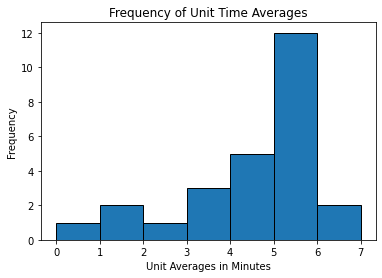

In [14]:
unit_avg = df_tu['Total_time'].astype('timedelta64[m]').plot.hist(bins = 7, edgecolor = 'black')
plt.xlabel('Unit Averages in Minutes')
plt.title("Frequency of Unit Time Averages")
unit_avg

Out of the 26 units, a majority of the averages fall between 5 and 6 minutes except for BC271 and CARE7. 

In [15]:
# Create a new time under percentage dataframe based off of the original df.
# Create an under_6_column that is used to find the total dispatches that meet the benchmark for each unit.
# The Amount_dispatches_under column aggregates the total amounts of times each unit meets the time goal.
df["under_6_min"] = (df["Total_time"]<time_standard).astype(int)
df["Amount_dispatches_under"] = df.groupby("Unit")["under_6_min"].transform("sum")
df['Total_dispatches'] = df.groupby("Unit")["under_6_min"].transform("count")

df

,Unit,Inci_no,City,Fdid,Final_nature,Dispatch_Datetime,Notification_Datetime,Roll_Datetime,Arrival_Datetime,ObjectId,Total_time,under_6_min,Amount_dispatches_under,Total_dispatches
0,E271,15-0000042,TEMPE,8293,DB,2015/01/01 07:28:41+00,2015/01/01 07:29:25+00,2015/01/01 07:30:05+00,2015/01/01 07:34:13+00,5635,0 days 00:05:32,1,883,1154
1,E272,15-0000045,TEMPE,8293,DB,2015/01/01 07:33:19+00,2015/01/01 07:34:36+00,2015/01/01 07:35:04+00,2015/01/01 07:39:20+00,6898,0 days 00:06:01,0,708,922
2,LT273,15-0000050,TEMPE,8293,DIAB,2015/01/01 07:36:45+00,2015/01/01 07:37:10+00,2015/01/01 07:38:08+00,2015/01/01 07:40:54+00,2016,0 days 00:04:09,1,505,678
3,E273,15-0000113,TEMPE,8293,DB,2015/01/01 08:14:21+00,2015/01/01 08:14:53+00,2015/01/01 08:15:43+00,2015/01/01 08:17:29+00,683,0 days 00:03:08,1,668,868
4,LT276,15-0000123,TEMPE,8293,UNC,2015/01/01 08:21:50+00,2015/01/01 08:22:08+00,2015/01/01 08:22:38+00,2015/01/01 08:24:40+00,189,0 days 00:02:50,1,280,330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9200,E272,15-0443724,TEMPE,8293,HA,2015/12/31 22:11:08+00,2015/12/31 22:11:50+00,2015/12/31 22:12:30+00,2015/12/31 22:14:07+00,758,0 days 00:02:59,1,708,922
9201,E271,15-0443918,TEMPE,8293,INTB,2016/01/01 01:32:30+00,2016/01/01 01:34:48+00,2016/01/01 01:35:33+00,2016/01/01 01:36:57+00,3087,0 days 00:04:27,1,883,1154
9202,E271,15-0443928,TEMPE,8293,ALOC,2016/01/01 01:38:10+00,2016/01/01 01:42:43+00,2016/01/01 01:42:43+00,2016/01/01 01:50:01+00,8961,0 days 00:11:51,0,883,1154
9203,E273,15-0444179,TEMPE,8293,CVA,2016/01/01 05:59:12+00,2016/01/01 05:59:56+00,2016/01/01 06:00:42+00,2016/01/01 06:03:48+00,3369,0 days 00:04:36,1,668,868


In [16]:
df_unit_stats = df.groupby("Unit")["Amount_dispatches_under"].median().reset_index()
df_unit_stats2 = df.groupby("Unit")["Total_dispatches"].median().reset_index()
df_unit_stats['Total_dispatches'] = df_unit_stats2['Total_dispatches']
df_unit_stats['Percent_benchmark_met'] = round((df_unit_stats['Amount_dispatches_under']/df_unit_stats['Total_dispatches'])*100)
df_unit_stats

,Unit,Amount_dispatches_under,Total_dispatches,Percent_benchmark_met
0,BC271,30,74,41.0
1,C2700,1,1,100.0
2,C2701,1,1,100.0
3,C2741,1,1,100.0
4,C278,1,1,100.0
5,CARE7,1,4,25.0
6,E271,883,1154,77.0
7,E272,708,922,77.0
8,E273,668,868,77.0
9,E274,677,1010,67.0


In [17]:
df_unit_stats['Percent_benchmark_met'].describe()

count     26.000000
mean      78.346154
std       19.070275
min       25.000000
25%       67.750000
50%       77.000000
75%      100.000000
max      100.000000
Name: Percent_benchmark_met, dtype: float64

<AxesSubplot:title={'center':'Percentage of Dispatches under 6 Minutes Per Unit'}, xlabel='Percentage', ylabel='Unit'>

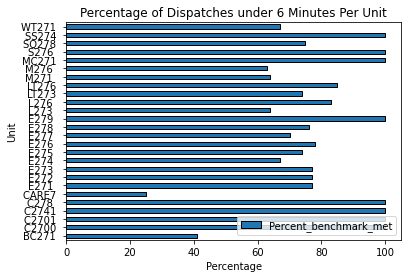

In [18]:
bp = df_unit_stats.plot.barh(y='Percent_benchmark_met', x='Unit', edgecolor = 'black', width=.5)
bp.set_xlabel('Percentage')
bp.set_title("Percentage of Dispatches under 6 Minutes Per Unit")
bp

With an average success percentage rate of roughly 78%, we will set a lenient baseline of 70% in order to identify any underperforming units. 7 units achieved a time less than 6 minutes for less than 70% of their dispatches thus effectively allowing us to answer our question and pinpoint areas of improvement for the Tempre Fire Medical Rescue Department. 

# Conclusion

The analysis of this dataset has concluded that the Tempe Fire Medical Rescue Department has not met the goal of achieving 90% of dispatches in under 6 minutes for the year 2015. We have also displayed and identified the units that are underperforming the most in regards to their response times. We can further suggest that the proposed benchmark may be too high or unrealistic for the TMFR and advocate for the implementation of a more plausible and attainable goal time. 